<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# For the "Median value of owner-occupied homes" provide a boxplot

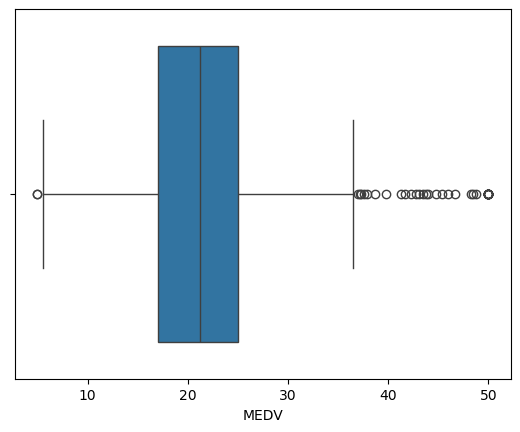

In [9]:
ax = sns.boxplot(x="MEDV", data=boston_df)
plt.show()


# Provide a  bar plot for the Charles river variable

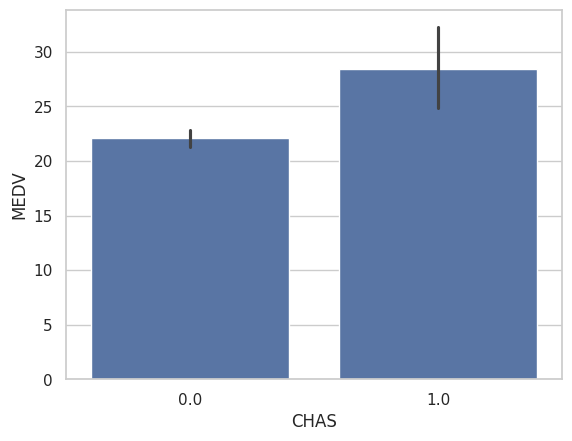

In [11]:
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", y="MEDV" ,data=boston_df)
plt.show()

# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

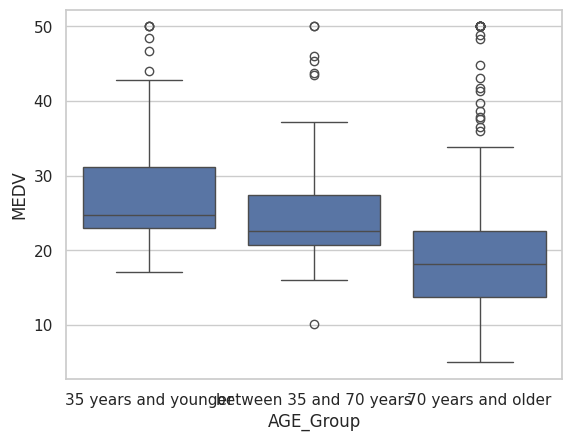

In [12]:
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.show()

# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

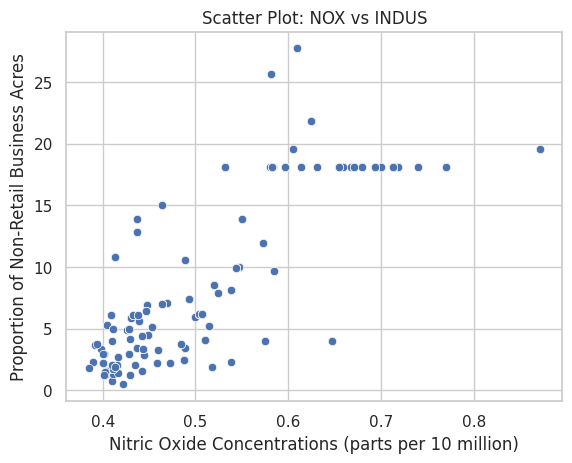

In [13]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.xlabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.title('Scatter Plot: NOX vs INDUS')
plt.show()

# Create a histogram for the pupil to teacher ratio variable

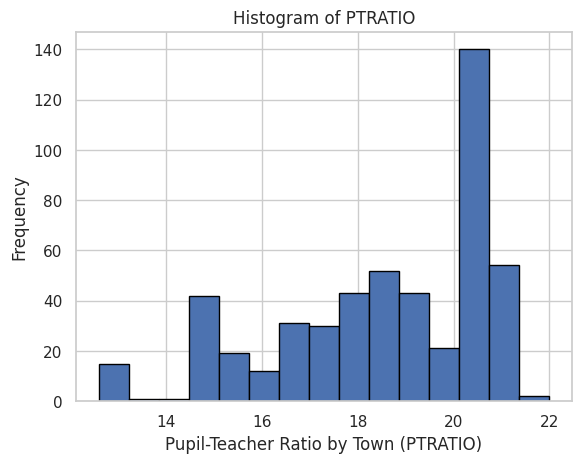

In [14]:
plt.hist(boston_df['PTRATIO'], bins=15, edgecolor='black') 
plt.xlabel('Pupil-Teacher Ratio by Town (PTRATIO)')
plt.ylabel('Frequency')
plt.title('Histogram of PTRATIO')
plt.grid(True)
plt.show()

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [16]:
from scipy import stats

chas_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_value = stats.ttest_ind(chas_not_bounded, chas_bounded)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values.")

T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in median values.


# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [17]:
from scipy import stats

age_35_younger = boston_df[boston_df['AGE'] <= 35]['MEDV']
age_35_70 = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70)]['MEDV']
age_70_older = boston_df[boston_df['AGE'] > 70]['MEDV']

f_stat, p_value = stats.f_oneway(age_35_younger, age_35_70, age_70_older)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values across AGE groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values across AGE groups.")


F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Reject the null hypothesis: There is a significant difference in median values across AGE groups.


# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [18]:
from scipy import stats

nox_values = boston_df['NOX']
indus_values = boston_df['INDUS']

corr_coef, p_value = stats.pearsonr(nox_values, indus_values)

print(f"Pearson Correlation Coefficient: {corr_coef}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between NOX and INDUS.")


Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
Reject the null hypothesis: There is a significant relationship between NOX and INDUS.


# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

R-squared: 0.07332042069244582
Root Mean Squared Error (RMSE): 8.243598687954156


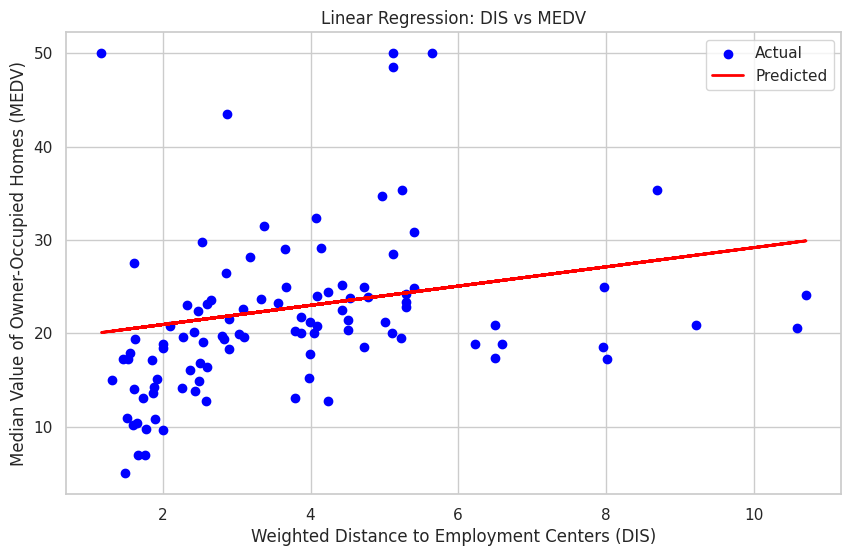

Coefficient (DIS): 1.0295093986065047


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


X = boston_df[['DIS']] 
y = boston_df['MEDV']    


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)


print(f"R-squared: {r_squared}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Weighted Distance to Employment Centers (DIS)')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Linear Regression: DIS vs MEDV')
plt.legend()
plt.show()

print(f"Coefficient (DIS): {model.coef_[0]}")
